In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
use_cuda = torch.cuda.is_available()
device   = torch.device("cuda" if use_cuda else "cpu")
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
from PIL import Image


C:\Users\Vansh\AppData\Local\Temp\ipykernel_5488\2964899601.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Pytorchenv\TorchEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_folder = r'C:\Users\Vansh\Desktop\projects\Maverick\Garbage\Training'
test_folder = r'C:\Users\Vansh\Desktop\projects\Maverick\Garbage\test'
val_folder = r'C:\Users\Vansh\Desktop\projects\Maverick\Garbage\validation'

In [3]:
"""import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
source_folder = r"C:\Users\Vansh\Desktop\projects\Maverick\Garbage\New folder"
train_folder = r'C:\Users\Vansh\Desktop\projects\Maverick\Garbage\Training'
test_folder = r'C:\Users\Vansh\Desktop\projects\Maverick\Garbage\test'
val_folder = r'C:\Users\Vansh\Desktop\projects\Maverick\Garbage\validation'

# Create train and test folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)
# Get a list of all subfolders in the source folder
subfolders = [f for f in os.listdir(source_folder) if os.path.isdir(os.path.join(source_folder, f))]

for subfolder in subfolders:
    # Create subfolders in train and test folders
    os.makedirs(os.path.join(train_folder, subfolder), exist_ok=True)
    os.makedirs(os.path.join(test_folder, subfolder), exist_ok=True)
    os.makedirs(os.path.join(val_folder, subfolder), exist_ok=True)
    # Get a list of all image files in the subfolder
    image_files = [f for f in os.listdir(os.path.join(source_folder, subfolder)) if os.path.isfile(os.path.join(source_folder, subfolder, f))]

    # Split the dataset into train and test sets
    train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42) # SPLIT SIZE CHANGE HERE
    train_files, val_files = train_test_split(train_files, test_size=0.25, random_state=42)
    # Move files to respective folders
    for file_name in train_files:
        source_path = os.path.join(source_folder, subfolder, file_name)
        destination_path = os.path.join(train_folder, subfolder, file_name)
        shutil.copy(source_path, destination_path)

    for file_name in test_files:
        source_path = os.path.join(source_folder, subfolder, file_name)
        destination_path = os.path.join(test_folder, subfolder, file_name)
        shutil.copy(source_path, destination_path)
    
    for file_name in val_files:
        source_path = os.path.join(source_folder, subfolder, file_name)
        destination_path = os.path.join(val_folder, subfolder, file_name)
        shutil.copy(source_path, destination_path)"""

In [4]:
num_classes = 8
learning_rate = 1e-4
batch_size = 16
num_epochs = 30

In [5]:
from torch.utils.data import DataLoader
import torch
import torchvision.transforms as transforms
from torchvision import datasets


train_dataset = datasets.ImageFolder(root=train_folder, transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    #transforms.RandomAdjustSharpness(0.4),
    #transforms.RandomAutocontrast(),
    #transforms.Grayscale(num_output_channels=3),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),  # Normalize to range [-1, 1]
]))

val_dataset = datasets.ImageFolder(root=val_folder, transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    #transforms.RandomAdjustSharpness(0.4),
    #transforms.RandomAutocontrast(),
    #transforms.Grayscale(num_output_channels=3),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),  # Normalize to range [-1, 1]
]))
test_dataset = datasets.ImageFolder(root=test_folder, transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    #transforms.RandomAdjustSharpness(0.4),
    #transforms.RandomAutocontrast(),
    #transforms.Grayscale(num_output_channels=3),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),  # Normalize to range [-1, 1]
]))



train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

num_train_images = len(train_loader.dataset)
print(f"Number of images in the training dataloader: {num_train_images}")


num_val_images = len(val_loader.dataset)
print(f"Number of images in the validation dataloader: {num_val_images}")

num_test_images = len(test_loader.dataset)
print(f"Number of images in the testing dataloader: {num_test_images}")


Number of images in the training dataloader: 1653
Number of images in the validation dataloader: 555
Number of images in the testing dataloader: 556


In [5]:
"""import torch.nn as nn
class CustomClassifier(nn.Module):
    def __init__(self, in_features, num_classes=6):
        super(CustomClassifier, self).__init__()
        
        self.fc1_1=nn.Linear(in_features=in_features, out_features=num_classes)
        

    def forward(self, x):
        
        x = self.fc1_1(x)
       
        return x"""

In [6]:
#from torchvision.models import densenet169,  DenseNet169_Weights
#model=densenet169(weights=DenseNet169_Weights.IMAGENET1K_V1)

In [6]:
from transformers import AutoImageProcessor, EfficientFormerForImageClassification
import torch
image_processor = AutoImageProcessor.from_pretrained("snap-research/efficientformer-l1-300")
model = EfficientFormerForImageClassification.from_pretrained("snap-research/efficientformer-l1-300")

In [7]:
import torch.nn as nn
class garbageClassifier(nn.Module):
    def __init__(self, in_features, num_classes=8):
        super(garbageClassifier, self).__init__()
        
        self.fc1_1=nn.Linear(in_features=448, out_features=num_classes)
        

    def forward(self, x):
        
        x = self.fc1_1(x)
       
        return x

In [8]:
for name, param in model.named_parameters():
    if not name.startswith('classifier'):  # Exclude parameters of the last classification layer
        param.requires_grad = False



num_ftrs = model.classifier
model.classifier = garbageClassifier(num_ftrs)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

EfficientFormerForImageClassification(
  (efficientformer): EfficientFormerModel(
    (patch_embed): EfficientFormerConvStem(
      (convolution1): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (batchnorm_before): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (convolution2): Conv2d(24, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (batchnorm_after): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): ReLU()
    )
    (encoder): EfficientFormerEncoder(
      (intermediate_stages): ModuleList(
        (0): EfficientFormerIntermediateStage(
          (meta4D_layers): EfficientFormerMeta4DLayers(
            (blocks): ModuleList(
              (0-2): 3 x EfficientFormerMeta4D(
                (token_mixer): EfficientFormerPooling(
                  (pool): AvgPool2d(kernel_size=3, stride=1, padding=1)
                )
                (mlp): EfficientFormerConvMlp

In [9]:
from torchsummary import summary
model_stats = summary(model, verbose=1)
summary_str = str(model_stats)

Layer (type:depth-idx)                                       Param #
├─EfficientFormerModel: 1-1                                  --
|    └─EfficientFormerConvStem: 2-1                          --
|    |    └─Conv2d: 3-1                                      (672)
|    |    └─BatchNorm2d: 3-2                                 (48)
|    |    └─Conv2d: 3-3                                      (10,416)
|    |    └─BatchNorm2d: 3-4                                 (96)
|    |    └─ReLU: 3-5                                        --
|    └─EfficientFormerEncoder: 2-2                           --
|    |    └─ModuleList: 3-6                                  (3,780,240)
|    |    └─EfficientFormerLastStage: 3-7                    (7,599,560)
|    └─LayerNorm: 2-3                                        (896)
├─garbageClassifier: 1-2                                     --
|    └─Linear: 2-4                                           3,592
Total params: 11,395,520
Trainable params: 3,592
Non-trainable

In [ ]:
"""from torchvision.models import densenet169,  DenseNet169_Weights

model=densenet169(weights=DenseNet169_Weights.IMAGENET1K_V1)
# Freeze all layers except the last classification layer
for name, param in model.named_parameters():
    if not name.startswith('classifier'):  # Exclude parameters of the last classification layer
        param.requires_grad = False
# Modify the last classification layer to have 4 output classes
num_ftrs = model.classifier.in_features
model.classifier = CustomClassifier(num_ftrs)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(model)"""

In [ ]:
"""from torchsummary import summary
model_stats = summary(model, (3, 128, 128), verbose=1)
summary_str = str(model_stats)"""

In [10]:
#from torch.optim import AdamW
from tqdm import tqdm
from lion_pytorch import Lion
from sklearn.metrics import precision_score, recall_score, f1_score
from torch.optim.lr_scheduler import ReduceLROnPlateau


In [11]:
criterion = nn.CrossEntropyLoss()
optimizer =Lion(model.parameters(), lr=learning_rate)
#optimizer = Lion(model.parameters(), lr=learning_rate)
# Training loop
#step=0
scheduler = ReduceLROnPlateau(optimizer, 'min',factor=0.01,patience=3)

for epoch in range(num_epochs):
    # Training
    model.train()  # Set model to training mode
    train_loss = 0.0
    correct_train = 0
    
    
    
        

    #Create and save new chcekpoints
    #if epoch % 3 == 0:
    #    checkpoint={'state_dict':model.state_dict(),'optimizer':optimizer.state_dict()}
    #    save_checkpoint(checkpoint)

    for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        
        inputs= inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()  # Zero the parameter gradients
        

        # Forward pass
        outputs = model(inputs)
        outputs = outputs.logits
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * inputs.size(0)
        
        _, preds = torch.max(outputs, 1)
        correct_train += (preds == labels).sum().item()
        training_acc=float(correct_train)/float(inputs.shape[0])

        #writer.add_scalar('Training Loss', train_loss, global_step=step)
        #writer.add_scalar('Training Accuracy', training_acc, global_step=step)
        #step+=1
        
    train_loss = train_loss / len(train_loader.dataset)
    train_accuracy = correct_train / len(train_loader.dataset) * 100
    
    
    # Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in tqdm(val_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            inputs= inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            outputs = outputs.logits
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

            _, preds = torch.max(outputs, 1)
            correct_val += (preds == labels).sum().item()

        # Collect predictions and labels for later evaluation
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate metrics
    val_loss = val_loss / len(val_loader.dataset)
    val_accuracy = correct_val / len(val_loader.dataset) * 100

    scheduler.step(val_loss)

    

    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=1)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=1)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=1)

    
    

    
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {train_loss:.4f}, Acc: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%')
    print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

Epoch 1/30: 100%|██████████| 35/35 [00:03<00:00,  9.92it/s]


Epoch 1/30, Loss: 1.9399, Acc: 30.73%, Val Loss: 1.7246, Val Acc: 54.59%
Precision: 0.5445, Recall: 0.5459, F1 Score: 0.5901


Epoch 2/30: 100%|██████████| 35/35 [00:02<00:00, 12.09it/s]


Epoch 2/30, Loss: 1.5346, Acc: 64.55%, Val Loss: 1.3663, Val Acc: 71.89%
Precision: 0.7133, Recall: 0.7189, F1 Score: 0.7068


Epoch 3/30: 100%|██████████| 35/35 [00:03<00:00,  9.94it/s]


Epoch 3/30, Loss: 1.2170, Acc: 73.02%, Val Loss: 1.1109, Val Acc: 74.41%
Precision: 0.7414, Recall: 0.7441, F1 Score: 0.7370


Epoch 4/30: 100%|██████████| 35/35 [00:02<00:00, 11.91it/s]


Epoch 4/30, Loss: 0.9851, Acc: 77.13%, Val Loss: 0.9210, Val Acc: 76.76%
Precision: 0.7654, Recall: 0.7676, F1 Score: 0.7616


Epoch 5/30: 100%|██████████| 35/35 [00:03<00:00, 10.19it/s]


Epoch 5/30, Loss: 0.8226, Acc: 78.89%, Val Loss: 0.7728, Val Acc: 79.28%
Precision: 0.7893, Recall: 0.7928, F1 Score: 0.7888


Epoch 6/30: 100%|██████████| 35/35 [00:02<00:00, 12.22it/s]


Epoch 6/30, Loss: 0.7087, Acc: 80.82%, Val Loss: 0.6853, Val Acc: 80.90%
Precision: 0.8054, Recall: 0.8090, F1 Score: 0.8057


Epoch 7/30: 100%|██████████| 35/35 [00:02<00:00, 12.26it/s]


Epoch 7/30, Loss: 0.6068, Acc: 83.00%, Val Loss: 0.6069, Val Acc: 82.52%
Precision: 0.8254, Recall: 0.8252, F1 Score: 0.8249


Epoch 8/30: 100%|██████████| 35/35 [00:02<00:00, 12.29it/s]


Epoch 8/30, Loss: 0.5479, Acc: 83.18%, Val Loss: 0.5617, Val Acc: 83.60%
Precision: 0.8350, Recall: 0.8360, F1 Score: 0.8351


Epoch 9/30: 100%|██████████| 35/35 [00:02<00:00, 11.91it/s]


Epoch 9/30, Loss: 0.4923, Acc: 86.87%, Val Loss: 0.5201, Val Acc: 85.41%
Precision: 0.8543, Recall: 0.8541, F1 Score: 0.8538


Epoch 10/30: 100%|██████████| 35/35 [00:02<00:00, 12.25it/s]


Epoch 10/30, Loss: 0.4495, Acc: 86.21%, Val Loss: 0.4859, Val Acc: 85.05%
Precision: 0.8507, Recall: 0.8505, F1 Score: 0.8505


Epoch 11/30: 100%|██████████| 35/35 [00:02<00:00, 12.43it/s]


Epoch 11/30, Loss: 0.4179, Acc: 87.30%, Val Loss: 0.4599, Val Acc: 86.13%
Precision: 0.8616, Recall: 0.8613, F1 Score: 0.8610


Epoch 12/30: 100%|██████████| 35/35 [00:02<00:00, 12.43it/s]


Epoch 12/30, Loss: 0.3961, Acc: 88.08%, Val Loss: 0.4524, Val Acc: 84.68%
Precision: 0.8464, Recall: 0.8468, F1 Score: 0.8461


Epoch 13/30: 100%|██████████| 35/35 [00:02<00:00, 12.43it/s]


Epoch 13/30, Loss: 0.3639, Acc: 88.99%, Val Loss: 0.4307, Val Acc: 86.31%
Precision: 0.8660, Recall: 0.8631, F1 Score: 0.8640


Epoch 14/30: 100%|██████████| 35/35 [00:02<00:00, 12.22it/s]


Epoch 14/30, Loss: 0.3558, Acc: 89.11%, Val Loss: 0.4145, Val Acc: 86.31%
Precision: 0.8632, Recall: 0.8631, F1 Score: 0.8630


Epoch 15/30: 100%|██████████| 35/35 [00:03<00:00, 10.92it/s]


Epoch 15/30, Loss: 0.3312, Acc: 89.59%, Val Loss: 0.4046, Val Acc: 86.85%
Precision: 0.8691, Recall: 0.8685, F1 Score: 0.8686


Epoch 16/30: 100%|██████████| 35/35 [00:03<00:00, 11.45it/s]


Epoch 16/30, Loss: 0.3100, Acc: 90.87%, Val Loss: 0.3991, Val Acc: 87.39%
Precision: 0.8770, Recall: 0.8739, F1 Score: 0.8745


Epoch 17/30: 100%|██████████| 35/35 [00:02<00:00, 12.39it/s]


Epoch 17/30, Loss: 0.2891, Acc: 92.08%, Val Loss: 0.3752, Val Acc: 86.85%
Precision: 0.8681, Recall: 0.8685, F1 Score: 0.8678


Epoch 18/30: 100%|██████████| 35/35 [00:02<00:00, 12.41it/s]


Epoch 18/30, Loss: 0.2812, Acc: 92.14%, Val Loss: 0.3764, Val Acc: 87.03%
Precision: 0.8708, Recall: 0.8703, F1 Score: 0.8704


Epoch 19/30: 100%|██████████| 35/35 [00:02<00:00, 12.57it/s]


Epoch 19/30, Loss: 0.2618, Acc: 92.74%, Val Loss: 0.3795, Val Acc: 87.39%
Precision: 0.8741, Recall: 0.8739, F1 Score: 0.8737


Epoch 20/30: 100%|██████████| 35/35 [00:03<00:00, 10.46it/s]


Epoch 20/30, Loss: 0.2580, Acc: 91.95%, Val Loss: 0.3675, Val Acc: 86.85%
Precision: 0.8694, Recall: 0.8685, F1 Score: 0.8686


Epoch 21/30: 100%|██████████| 35/35 [00:02<00:00, 12.47it/s]


Epoch 21/30, Loss: 0.2504, Acc: 92.98%, Val Loss: 0.3576, Val Acc: 87.93%
Precision: 0.8797, Recall: 0.8793, F1 Score: 0.8794


Epoch 22/30: 100%|██████████| 35/35 [00:02<00:00, 12.32it/s]


Epoch 22/30, Loss: 0.2387, Acc: 92.92%, Val Loss: 0.3610, Val Acc: 88.29%
Precision: 0.8838, Recall: 0.8829, F1 Score: 0.8832


Epoch 23/30: 100%|██████████| 35/35 [00:02<00:00, 11.97it/s]


Epoch 23/30, Loss: 0.2460, Acc: 92.38%, Val Loss: 0.3509, Val Acc: 88.11%
Precision: 0.8817, Recall: 0.8811, F1 Score: 0.8811


Epoch 24/30: 100%|██████████| 35/35 [00:03<00:00, 10.39it/s]


Epoch 24/30, Loss: 0.2264, Acc: 93.22%, Val Loss: 0.3560, Val Acc: 88.11%
Precision: 0.8823, Recall: 0.8811, F1 Score: 0.8813


Epoch 25/30: 100%|██████████| 35/35 [00:02<00:00, 12.38it/s]


Epoch 25/30, Loss: 0.2121, Acc: 94.01%, Val Loss: 0.3423, Val Acc: 87.39%
Precision: 0.8745, Recall: 0.8739, F1 Score: 0.8739


Epoch 26/30: 100%|██████████| 35/35 [00:02<00:00, 12.45it/s]


Epoch 26/30, Loss: 0.2131, Acc: 93.65%, Val Loss: 0.3419, Val Acc: 87.39%
Precision: 0.8750, Recall: 0.8739, F1 Score: 0.8740


Epoch 27/30: 100%|██████████| 35/35 [00:03<00:00, 10.88it/s]


Epoch 27/30, Loss: 0.1991, Acc: 95.28%, Val Loss: 0.3482, Val Acc: 87.75%
Precision: 0.8788, Recall: 0.8775, F1 Score: 0.8778


Epoch 28/30: 100%|██████████| 35/35 [00:02<00:00, 12.43it/s]


Epoch 28/30, Loss: 0.2005, Acc: 94.62%, Val Loss: 0.3427, Val Acc: 87.93%
Precision: 0.8810, Recall: 0.8793, F1 Score: 0.8799


Epoch 29/30: 100%|██████████| 35/35 [00:02<00:00, 12.44it/s]


Epoch 29/30, Loss: 0.1898, Acc: 94.92%, Val Loss: 0.3465, Val Acc: 88.83%
Precision: 0.8887, Recall: 0.8883, F1 Score: 0.8881


Epoch 30/30: 100%|██████████| 35/35 [00:03<00:00, 10.09it/s]

Epoch 30/30, Loss: 0.1862, Acc: 94.62%, Val Loss: 0.3331, Val Acc: 87.75%
Precision: 0.8789, Recall: 0.8775, F1 Score: 0.8779


In [12]:
for epoch in range(1):
    model.eval()
    test_loss = 0.0
    correct_test= 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            inputs= inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            outputs = outputs.logits
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)

            _, preds = torch.max(outputs, 1)
            correct_test += (preds == labels).sum().item()

        # Collect predictions and labels for later evaluation
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate metrics
    test_loss = test_loss / len(test_loader.dataset)
    test_accuracy = correct_test / len(test_loader.dataset) * 100

    scheduler.step(test_loss)

    #writer.add_scalar('Validation Loss', val_loss, epoch)
    #writer.add_scalar('Validation Accuracy', val_accuracy, epoch)

    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=1)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=1)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=1)

    #writer.add_scalar('Precision', precision, epoch)
    #writer.add_scalar('Recall', recall, epoch)
    #writer.add_scalar('F1 Score', f1, epoch)
    
    

    # Print the epoch statistics
    print(f'test Loss: {test_loss:.4f}, test Acc: {test_accuracy:.2f}%')
    print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

Epoch 1/30: 100%|██████████| 35/35 [00:03<00:00,  9.21it/s]

test Loss: 0.3595, test Acc: 87.77%
Precision: 0.8788, Recall: 0.8777, F1 Score: 0.8777


In [13]:
confusion_matrix = torch.zeros(num_classes, num_classes)

with torch.no_grad():
    test_running_corrects = 0.0
    test_total = 0.0
    model.eval()
    for i, (test_inputs, test_labels) in enumerate(val_loader, 0):
        test_inputs, test_labels = test_inputs.cuda(), test_labels.cuda()

        test_outputs = model(test_inputs)
        test_outputs = test_outputs.logits
        _, test_preds = torch.max(test_outputs, dim=1)  # Get predicted classes

        test_total += test_labels.size(0)
        test_running_corrects += (test_preds == test_labels).sum().item()  # Calculate correct predictions

        for t, p in zip(test_labels.view(-1), test_preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1
        
    print(f'Testing Accuracy: {(100 * test_running_corrects / test_total)}%')
print(f'Confusion Matrix:\n {confusion_matrix}')

Testing Accuracy: 87.74774774774775%
Confusion Matrix:
 tensor([[ 72.,   0.,   0.,   0.,   1.,   7.,   1.,   0.],
        [  0.,  23.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,  25.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,  89.,   3.,   0.,   6.,   2.],
        [  0.,   0.,   0.,   9.,  65.,   0.,   6.,   2.],
        [  3.,   0.,   0.,   1.,   4., 107.,   0.,   4.],
        [  0.,   0.,   0.,   5.,   4.,   2.,  85.,   1.],
        [  2.,   0.,   0.,   1.,   3.,   0.,   1.,  21.]])


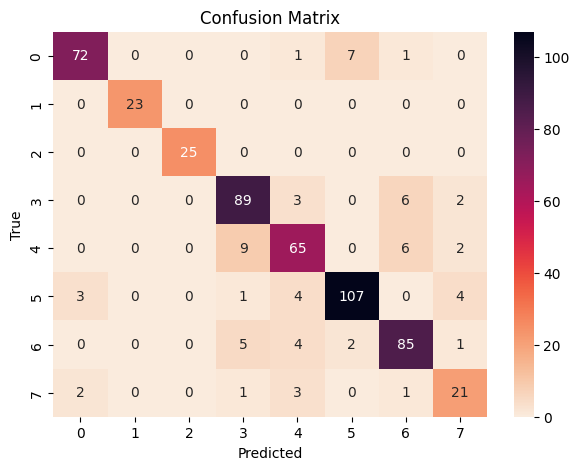

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the confusion matrix to a NumPy array
confusion_matrix_np = confusion_matrix.numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix_np, annot=True, fmt='g', cmap='rocket_r', 
            xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [15]:
torch.save(model, r'C:\Users\Vansh\Desktop\projects\Maverick\Garbage\gar_Eformer.pth')

In [16]:
import re

def parse_training_output(sample_text):
    # Extracting relevant information using regular expressions
    train_loss = [float(match.group(1)) for match in re.finditer(r'Epoch \d+/\d+, Loss: ([\d.]+), Acc:', sample_text)]
    
    # Extracting only the first occurrence of accuracy for each epoch
    train_acc = [float(match.group(1)) for match in re.finditer(r'Acc: ([\d.]+)%', sample_text)][::2]
    
    val_loss = [float(match.group(1)) for match in re.finditer(r'Val Loss: ([\d.]+)', sample_text)]
    val_acc = [float(match.group(1)) for match in re.finditer(r'Val Acc: ([\d.]+)%', sample_text)]
    precision = [float(match.group(1)) for match in re.finditer(r'Precision: ([\d.]+)', sample_text)]
    recall = [float(match.group(1)) for match in re.finditer(r'Recall: ([\d.]+)', sample_text)]
    f1_score = [float(match.group(1)) for match in re.finditer(r'F1 Score: ([\d.]+)', sample_text)]

    # Creating the dictionary
    data = {
        'Epoch': [i for i in range(1,31)],
        'Train_Loss': train_loss,
        'Train_Acc': train_acc,
        'Val_Loss': val_loss,
        'Val_Acc': val_acc,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1_score
    }

    return data

# Sample text
sample_text = """

Epoch 1/30: 100%|██████████| 104/104 [00:11<00:00,  8.69it/s]
Epoch 1/30: 100%|██████████| 35/35 [00:03<00:00,  9.92it/s]
Epoch 1/30, Loss: 1.9399, Acc: 30.73%, Val Loss: 1.7246, Val Acc: 54.59%
Precision: 0.5445, Recall: 0.5459, F1 Score: 0.5901
Epoch 2/30: 100%|██████████| 104/104 [00:09<00:00, 11.09it/s]
Epoch 2/30: 100%|██████████| 35/35 [00:02<00:00, 12.09it/s]
Epoch 2/30, Loss: 1.5346, Acc: 64.55%, Val Loss: 1.3663, Val Acc: 71.89%
Precision: 0.7133, Recall: 0.7189, F1 Score: 0.7068
Epoch 3/30: 100%|██████████| 104/104 [00:09<00:00, 10.90it/s]
Epoch 3/30: 100%|██████████| 35/35 [00:03<00:00,  9.94it/s]
Epoch 3/30, Loss: 1.2170, Acc: 73.02%, Val Loss: 1.1109, Val Acc: 74.41%
Precision: 0.7414, Recall: 0.7441, F1 Score: 0.7370
Epoch 4/30: 100%|██████████| 104/104 [00:09<00:00, 10.92it/s]
Epoch 4/30: 100%|██████████| 35/35 [00:02<00:00, 11.91it/s]
Epoch 4/30, Loss: 0.9851, Acc: 77.13%, Val Loss: 0.9210, Val Acc: 76.76%
Precision: 0.7654, Recall: 0.7676, F1 Score: 0.7616
Epoch 5/30: 100%|██████████| 104/104 [00:09<00:00, 10.66it/s]
Epoch 5/30: 100%|██████████| 35/35 [00:03<00:00, 10.19it/s]
Epoch 5/30, Loss: 0.8226, Acc: 78.89%, Val Loss: 0.7728, Val Acc: 79.28%
Precision: 0.7893, Recall: 0.7928, F1 Score: 0.7888
Epoch 6/30: 100%|██████████| 104/104 [00:08<00:00, 11.81it/s]
Epoch 6/30: 100%|██████████| 35/35 [00:02<00:00, 12.22it/s]
Epoch 6/30, Loss: 0.7087, Acc: 80.82%, Val Loss: 0.6853, Val Acc: 80.90%
Precision: 0.8054, Recall: 0.8090, F1 Score: 0.8057
Epoch 7/30: 100%|██████████| 104/104 [00:08<00:00, 11.76it/s]
Epoch 7/30: 100%|██████████| 35/35 [00:02<00:00, 12.26it/s]
Epoch 7/30, Loss: 0.6068, Acc: 83.00%, Val Loss: 0.6069, Val Acc: 82.52%
Precision: 0.8254, Recall: 0.8252, F1 Score: 0.8249
Epoch 8/30: 100%|██████████| 104/104 [00:08<00:00, 11.81it/s]
Epoch 8/30: 100%|██████████| 35/35 [00:02<00:00, 12.29it/s]
Epoch 8/30, Loss: 0.5479, Acc: 83.18%, Val Loss: 0.5617, Val Acc: 83.60%
Precision: 0.8350, Recall: 0.8360, F1 Score: 0.8351
Epoch 9/30: 100%|██████████| 104/104 [00:08<00:00, 11.80it/s]
Epoch 9/30: 100%|██████████| 35/35 [00:02<00:00, 11.91it/s]
Epoch 9/30, Loss: 0.4923, Acc: 86.87%, Val Loss: 0.5201, Val Acc: 85.41%
Precision: 0.8543, Recall: 0.8541, F1 Score: 0.8538
Epoch 10/30: 100%|██████████| 104/104 [00:08<00:00, 11.84it/s]
Epoch 10/30: 100%|██████████| 35/35 [00:02<00:00, 12.25it/s]
Epoch 10/30, Loss: 0.4495, Acc: 86.21%, Val Loss: 0.4859, Val Acc: 85.05%
Precision: 0.8507, Recall: 0.8505, F1 Score: 0.8505
Epoch 11/30: 100%|██████████| 104/104 [00:09<00:00, 10.74it/s]
Epoch 11/30: 100%|██████████| 35/35 [00:02<00:00, 12.43it/s]
Epoch 11/30, Loss: 0.4179, Acc: 87.30%, Val Loss: 0.4599, Val Acc: 86.13%
Precision: 0.8616, Recall: 0.8613, F1 Score: 0.8610
Epoch 12/30: 100%|██████████| 104/104 [00:08<00:00, 11.96it/s]
Epoch 12/30: 100%|██████████| 35/35 [00:02<00:00, 12.43it/s]
Epoch 12/30, Loss: 0.3961, Acc: 88.08%, Val Loss: 0.4524, Val Acc: 84.68%
Precision: 0.8464, Recall: 0.8468, F1 Score: 0.8461
Epoch 13/30: 100%|██████████| 104/104 [00:08<00:00, 11.91it/s]
Epoch 13/30: 100%|██████████| 35/35 [00:02<00:00, 12.43it/s]
Epoch 13/30, Loss: 0.3639, Acc: 88.99%, Val Loss: 0.4307, Val Acc: 86.31%
Precision: 0.8660, Recall: 0.8631, F1 Score: 0.8640
Epoch 14/30: 100%|██████████| 104/104 [00:08<00:00, 11.96it/s]
Epoch 14/30: 100%|██████████| 35/35 [00:02<00:00, 12.22it/s]
Epoch 14/30, Loss: 0.3558, Acc: 89.11%, Val Loss: 0.4145, Val Acc: 86.31%
Precision: 0.8632, Recall: 0.8631, F1 Score: 0.8630
Epoch 15/30: 100%|██████████| 104/104 [00:08<00:00, 11.86it/s]
Epoch 15/30: 100%|██████████| 35/35 [00:03<00:00, 10.92it/s]
Epoch 15/30, Loss: 0.3312, Acc: 89.59%, Val Loss: 0.4046, Val Acc: 86.85%
Precision: 0.8691, Recall: 0.8685, F1 Score: 0.8686
Epoch 16/30: 100%|██████████| 104/104 [00:10<00:00, 10.33it/s]
Epoch 16/30: 100%|██████████| 35/35 [00:03<00:00, 11.45it/s]
Epoch 16/30, Loss: 0.3100, Acc: 90.87%, Val Loss: 0.3991, Val Acc: 87.39%
Precision: 0.8770, Recall: 0.8739, F1 Score: 0.8745
Epoch 17/30: 100%|██████████| 104/104 [00:08<00:00, 11.97it/s]
Epoch 17/30: 100%|██████████| 35/35 [00:02<00:00, 12.39it/s]
Epoch 17/30, Loss: 0.2891, Acc: 92.08%, Val Loss: 0.3752, Val Acc: 86.85%
Precision: 0.8681, Recall: 0.8685, F1 Score: 0.8678
Epoch 18/30: 100%|██████████| 104/104 [00:08<00:00, 11.93it/s]
Epoch 18/30: 100%|██████████| 35/35 [00:02<00:00, 12.41it/s]
Epoch 18/30, Loss: 0.2812, Acc: 92.14%, Val Loss: 0.3764, Val Acc: 87.03%
Precision: 0.8708, Recall: 0.8703, F1 Score: 0.8704
Epoch 19/30: 100%|██████████| 104/104 [00:08<00:00, 12.10it/s]
Epoch 19/30: 100%|██████████| 35/35 [00:02<00:00, 12.57it/s]
Epoch 19/30, Loss: 0.2618, Acc: 92.74%, Val Loss: 0.3795, Val Acc: 87.39%
Precision: 0.8741, Recall: 0.8739, F1 Score: 0.8737
Epoch 20/30: 100%|██████████| 104/104 [00:09<00:00, 11.20it/s]
Epoch 20/30: 100%|██████████| 35/35 [00:03<00:00, 10.46it/s]
Epoch 20/30, Loss: 0.2580, Acc: 91.95%, Val Loss: 0.3675, Val Acc: 86.85%
Precision: 0.8694, Recall: 0.8685, F1 Score: 0.8686
Epoch 21/30: 100%|██████████| 104/104 [00:09<00:00, 10.98it/s]
Epoch 21/30: 100%|██████████| 35/35 [00:02<00:00, 12.47it/s]
Epoch 21/30, Loss: 0.2504, Acc: 92.98%, Val Loss: 0.3576, Val Acc: 87.93%
Precision: 0.8797, Recall: 0.8793, F1 Score: 0.8794
Epoch 22/30: 100%|██████████| 104/104 [00:08<00:00, 12.10it/s]
Epoch 22/30: 100%|██████████| 35/35 [00:02<00:00, 12.32it/s]
Epoch 22/30, Loss: 0.2387, Acc: 92.92%, Val Loss: 0.3610, Val Acc: 88.29%
Precision: 0.8838, Recall: 0.8829, F1 Score: 0.8832
Epoch 23/30: 100%|██████████| 104/104 [00:08<00:00, 12.03it/s]
Epoch 23/30: 100%|██████████| 35/35 [00:02<00:00, 11.97it/s]
Epoch 23/30, Loss: 0.2460, Acc: 92.38%, Val Loss: 0.3509, Val Acc: 88.11%
Precision: 0.8817, Recall: 0.8811, F1 Score: 0.8811
Epoch 24/30: 100%|██████████| 104/104 [00:09<00:00, 10.91it/s]
Epoch 24/30: 100%|██████████| 35/35 [00:03<00:00, 10.39it/s]
Epoch 24/30, Loss: 0.2264, Acc: 93.22%, Val Loss: 0.3560, Val Acc: 88.11%
Precision: 0.8823, Recall: 0.8811, F1 Score: 0.8813
Epoch 25/30: 100%|██████████| 104/104 [00:09<00:00, 11.05it/s]
Epoch 25/30: 100%|██████████| 35/35 [00:02<00:00, 12.38it/s]
Epoch 25/30, Loss: 0.2121, Acc: 94.01%, Val Loss: 0.3423, Val Acc: 87.39%
Precision: 0.8745, Recall: 0.8739, F1 Score: 0.8739
Epoch 26/30: 100%|██████████| 104/104 [00:08<00:00, 11.95it/s]
Epoch 26/30: 100%|██████████| 35/35 [00:02<00:00, 12.45it/s]
Epoch 26/30, Loss: 0.2131, Acc: 93.65%, Val Loss: 0.3419, Val Acc: 87.39%
Precision: 0.8750, Recall: 0.8739, F1 Score: 0.8740
Epoch 27/30: 100%|██████████| 104/104 [00:08<00:00, 11.92it/s]
Epoch 27/30: 100%|██████████| 35/35 [00:03<00:00, 10.88it/s]
Epoch 27/30, Loss: 0.1991, Acc: 95.28%, Val Loss: 0.3482, Val Acc: 87.75%
Precision: 0.8788, Recall: 0.8775, F1 Score: 0.8778
Epoch 28/30: 100%|██████████| 104/104 [00:09<00:00, 10.51it/s]
Epoch 28/30: 100%|██████████| 35/35 [00:02<00:00, 12.43it/s]
Epoch 28/30, Loss: 0.2005, Acc: 94.62%, Val Loss: 0.3427, Val Acc: 87.93%
Precision: 0.8810, Recall: 0.8793, F1 Score: 0.8799
Epoch 29/30: 100%|██████████| 104/104 [00:08<00:00, 11.91it/s]
Epoch 29/30: 100%|██████████| 35/35 [00:02<00:00, 12.44it/s]
Epoch 29/30, Loss: 0.1898, Acc: 94.92%, Val Loss: 0.3465, Val Acc: 88.83%
Precision: 0.8887, Recall: 0.8883, F1 Score: 0.8881
Epoch 30/30: 100%|██████████| 104/104 [00:09<00:00, 10.86it/s]
Epoch 30/30: 100%|██████████| 35/35 [00:03<00:00, 10.09it/s]
Epoch 30/30, Loss: 0.1862, Acc: 94.62%, Val Loss: 0.3331, Val Acc: 87.75%
Precision: 0.8789, Recall: 0.8775, F1 Score: 0.8779



"""

# Calling the function
parsed_data = parse_training_output(sample_text)
# Displaying the result
print(parsed_data)

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'Train_Loss': [1.9399, 1.5346, 1.217, 0.9851, 0.8226, 0.7087, 0.6068, 0.5479, 0.4923, 0.4495, 0.4179, 0.3961, 0.3639, 0.3558, 0.3312, 0.31, 0.2891, 0.2812, 0.2618, 0.258, 0.2504, 0.2387, 0.246, 0.2264, 0.2121, 0.2131, 0.1991, 0.2005, 0.1898, 0.1862], 'Train_Acc': [30.73, 64.55, 73.02, 77.13, 78.89, 80.82, 83.0, 83.18, 86.87, 86.21, 87.3, 88.08, 88.99, 89.11, 89.59, 90.87, 92.08, 92.14, 92.74, 91.95, 92.98, 92.92, 92.38, 93.22, 94.01, 93.65, 95.28, 94.62, 94.92, 94.62], 'Val_Loss': [1.7246, 1.3663, 1.1109, 0.921, 0.7728, 0.6853, 0.6069, 0.5617, 0.5201, 0.4859, 0.4599, 0.4524, 0.4307, 0.4145, 0.4046, 0.3991, 0.3752, 0.3764, 0.3795, 0.3675, 0.3576, 0.361, 0.3509, 0.356, 0.3423, 0.3419, 0.3482, 0.3427, 0.3465, 0.3331], 'Val_Acc': [54.59, 71.89, 74.41, 76.76, 79.28, 80.9, 82.52, 83.6, 85.41, 85.05, 86.13, 84.68, 86.31, 86.31, 86.85, 87.39, 86.85, 87.03, 87.39, 86.85, 87

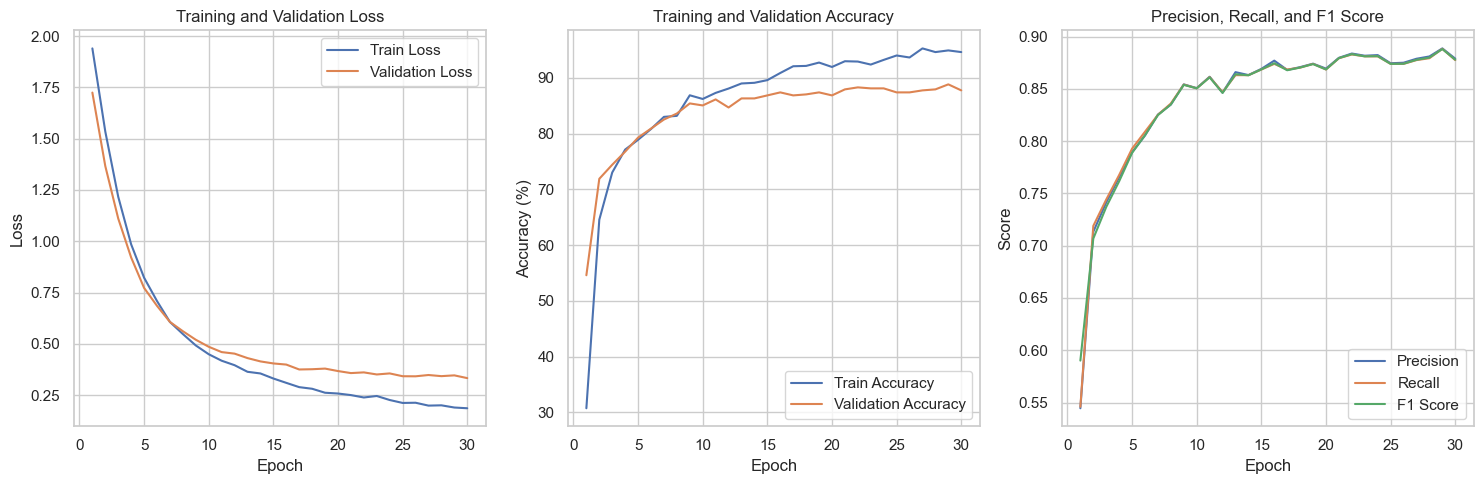

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

##################################################################################################


##################################################################################################

# Convert data to a Pandas DataFrame
df = pd.DataFrame(parsed_data)

# Set the style of Seaborn
sns.set(style="whitegrid")

# Create a horizontal line subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the training and validation loss
sns.lineplot(x='Epoch', y='Train_Loss', data=df, label='Train Loss', ax=axes[0])
sns.lineplot(x='Epoch', y='Val_Loss', data=df, label='Validation Loss', ax=axes[0])
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')

# Plotting the training and validation accuracy
sns.lineplot(x='Epoch', y='Train_Acc', data=df, label='Train Accuracy', ax=axes[1])
sns.lineplot(x='Epoch', y='Val_Acc', data=df, label='Validation Accuracy', ax=axes[1])
axes[1].set_title('Training and Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy (%)')

# Plotting the precision, recall, and F1 score
sns.lineplot(x='Epoch', y='Precision', data=df, label='Precision', ax=axes[2])
sns.lineplot(x='Epoch', y='Recall', data=df, label='Recall', ax=axes[2])
sns.lineplot(x='Epoch', y='F1_Score', data=df, label='F1 Score', ax=axes[2])
axes[2].set_title('Precision, Recall, and F1 Score')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Score')

plt.tight_layout()
#plt.savefig(r'D:\ADNI\model_inferences\EFFICIENTNET_B0_lion_64_lr.png',dpi=300)
plt.show()